# 7.2.1 Ομαδοποιήσεις σε Κοινότητες Δικτύων Συνεμφανιζομένων Hashtags

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import json 
import os
import imp
import networkx as nx
from collections import Counter
import itertools as it
import seaborn as sns
# sns.set()
sns.set_style("white")
sns.set_style("ticks") 
%load_ext autoreload

import matplotlib.pyplot as plt
%matplotlib inline
import random


#pip install --user python-louvain
import community

vhma 1: {0: 0, 1: 0, 2: 0, 3: 1, 4: 1} -0.12


-0.12

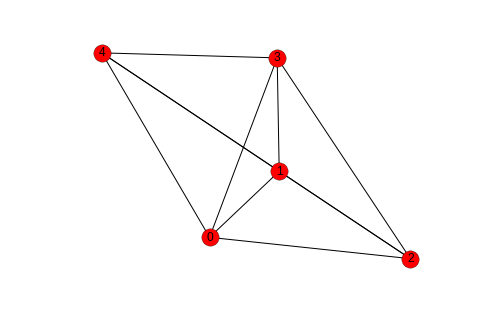

In [12]:
# H=nx.Graph()
# H.add_edges_from([(0,1)])
# pos={0:(0,1),1:(1,0)}

H=nx.complete_graph(5)

nx.draw(H, with_labels=True)
partition = {0: 0, 1: 0,2:0, 3:1,4:1}
# print "vhma 0:", partition, community.modularity(partition,H)
# partition = community.best_partition(H)
print "vhma 1:", partition, community.modularity(partition,H)
(-16.*3)/(20*20)

{0: 0, 1: 0, 2: 0, 3: 1, 4: 1} <type 'dict'>


0.11111111111111113

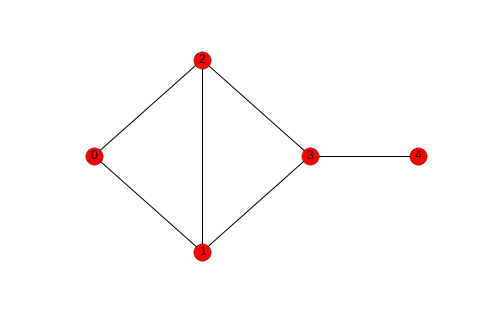

In [3]:
H=nx.Graph()
H.add_edges_from([(0,1),(0,2),(1,2),(1,3),(2,3),(3,4)])
pos={0:(0,1),1:(1,0),2:(1,2),3:(2,1),4:(3,1)}
nx.draw(H, pos=pos,with_labels=True)
partition = community.best_partition(H)
print partition, type(partition)
community.modularity(partition,H)

In [4]:
#vhma0 
partition = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
community.modularity(partition,H)

-0.22222222222222224

In [5]:
#vhma1 
#0-->1
partitionA = {0: 1, 1: 1, 2: 2, 3: 3, 4: 4}
print community.modularity(partitionA,H)
print community.modularity(partitionA,H) - community.modularity(partition,H)

#0-->2
partitionB = {0: 2, 1: 1, 2: 2, 3: 3, 4: 4}
print community.modularity(partitionB,H)
print  community.modularity(partitionA,H) - community.modularity(partition,H)


t= community.modularity(partitionA,H)
print t

-0.138888888889
0.0833333333333
-0.138888888889
0.0833333333333
-0.138888888889


### Επιλέγουμε την ενσωμάτωση του 0 στο 1 
### επομένως o διαμερισμός είναι: {0: 1, 1: 1, 2: 2, 3: 3, 4: 4} με modularity= -0.138888888889

In [6]:
#vhma2
# #1-->0
# partitionA = {0: 0, 1: 0, 2: 2, 3: 3, 4: 4}
# print community.modularity(partitionA,H)
# print community.modularity(partition,H)- community.modularity(partitionA,H)
#1-->2
partitionB = {0: 1, 1: 2, 2: 2, 3: 3, 4: 4}
print community.modularity(partitionB,H)
delta = community.modularity(partitionB,H) - t
print "delta = ",delta
#1-->3
partitionC = {0: 1, 1: 3, 2: 2, 3: 3, 4: 4}
print community.modularity(partitionC,H)
delta= community.modularity(partitionC,H) - t
print "delta = ",delta
print t

-0.180555555556
delta =  -0.0416666666667
-0.180555555556
delta =  -0.0416666666667
-0.138888888889


#### δεν κανουμε ενσωμάτωση αφού όλες οι διαφορές είναι αρνητικές

In [7]:
#vhma3
# #2-->0
# partitionA = {0: 1, 1: 1,2: 0, 3: 3, 4: 4}
# delta= community.modularity(partitionA,H) - t
# print "delta = ",delta
#2-->1
partitionB = {0: 1, 1: 2, 2: 1, 3: 3, 4: 4}
delta= community.modularity(partitionB,H)- t
print "delta = ",delta
#2-->3
partitionC = {0: 1, 1: 2, 2: 3, 3: 3, 4: 4}
delta= community.modularity(partitionC,H)- t
print "delta = ",delta

delta =  0.0
delta =  -0.0416666666667


#### επιλέγουμε την ενσωμάτωση του 2 στην ομάδα των 0 και 1.
#### {0: 1, 1: 2, 2: 1, 3: 3, 4: 4} με modularity αμετάβλητο

In [8]:
#vhma4
#3-->1
partitionA = {0: 1, 1: 1, 2: 1, 3: 1, 4: 4}
delta= community.modularity(partitionA,H) -t
print "delta = ",delta
#3-->2
partitionB = {0: 1, 1: 1, 2: 1, 3: 2, 4: 4}
delta=community.modularity(partitionB,H) - t
print "delta = ",delta
#3-->4
partitionC = {0: 1, 1: 1, 2: 1, 3: 4, 4: 4}
delta=community.modularity(partitionC,H) -t 
print "delta = ",delta
t=community.modularity(partitionC,H)
print t

delta =  0.125
delta =  0.125
delta =  0.25
0.111111111111


### Επιλέγουμε την ενσωμάτωση του 3 στο 4 
### επομένως ο διαμερισμός είναι : {0: 1, 1: 1, 2: 1, 3: 4, 4: 4} με modularity= 0.1111111

In [11]:
t=-0.0138888888889
#0-->(2)
partitionA = {0: 1, 1: 1, 2: 1, 3: 4, 4: 4}
delta=community.modularity(partitionA,H) -t 
print "delta = ",delta
# #2-->(34)
# partitionB = {0: 1, 1: 1, 2: 4, 3: 4, 4: 4}
# delta=community.modularity(partitionB,H) -t 
# print "delta = ",delta

t= community.modularity(partitionA,H)
print t

delta =  0.125
0.111111111111


### Επιλέγουμε την ενσωμάτωση του 0 στο 2 
### επομένως ο διαμερισμός είναι : {0: 2, 1: 1, 2: 2, 3: 4, 4: 4} με modularity= -0.0138888888889

In [20]:
t= -0.0138888888889
#1-->(20)
partitionA =  {0: 2, 1: 2, 2: 2, 3: 4, 4: 4}
delta=community.modularity(partitionA,H) -t 
print "delta = ",delta
#1-->(34)
partitionB =  {0: 2, 1: 4, 2: 2, 3: 4, 4: 4}
delta=community.modularity(partitionB,H) -t 
print "delta = ",delta

community.modularity(partitionA,H)

delta =  0.125
delta =  1.09946773907e-14


0.11111111111111113

### Επιλέγουμε την ενσωμάτωση του 1 στα 0,2
### επομένως ο διαμερισμός είναι : {0: 2, 1: 2, 2: 2, 3: 4, 4: 4} με modularity= 0.11111111111111113

In [21]:
t=0.11111111111111113

partitionA =  {0: 2, 1: 2, 2: 4, 3: 4, 4: 4}
delta=community.modularity(partitionA,H) -t 
print "delta = ",delta

partitionA =  {0: 2, 1: 2, 2: 2, 3: 2, 4: 4}
delta=community.modularity(partitionA,H) -t 
print "delta = ",delta

partitionA =  {0: 2, 1: 4, 2: 2, 3: 4, 4: 4}
delta=community.modularity(partitionA,H) -t 
print "delta = ",delta

# partitionA =  {0: 2, 1: 2, 2: 4, 3: 4, 4: 4}
# delta=community.modularity(partitionA,H) -t 
# print "delta = ",delta

delta =  -0.125
delta =  -0.125
delta =  -0.125


In [22]:
GG={}
import glob,os
# fildir='/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_hashtag_networks'
fildir='/home/dell/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_hashtag_networks'

lww=[]

os.chdir(fildir)
graphnames=glob.glob('*.gpic')
if len(graphnames)==0:
    print 'No graphs'
for grns in graphnames:
    ww=int(grns.split('_')[-1].split('.')[0])
    G=nx.read_gpickle(grns)
    
    G.name="G_%s" %ww
    GG[ww]=G
    lww.append(ww)

k=1
for ww in sorted(GG.keys()):
    print "The number %i cut hashtag network has %i nodes and %i edges" %(k,len(GG[ww].nodes()),len(GG[ww].edges()))
    k=k+1
print lww,len(lww)

The number 1 cut hashtag network has 9139 nodes and 35329 edges
The number 2 cut hashtag network has 3082 nodes and 19030 edges
The number 3 cut hashtag network has 1892 nodes and 14477 edges
The number 4 cut hashtag network has 1397 nodes and 12032 edges
The number 5 cut hashtag network has 1084 nodes and 10493 edges
The number 6 cut hashtag network has 889 nodes and 9290 edges
The number 7 cut hashtag network has 761 nodes and 8356 edges
The number 8 cut hashtag network has 676 nodes and 7646 edges
The number 9 cut hashtag network has 607 nodes and 7108 edges
The number 10 cut hashtag network has 552 nodes and 6693 edges
The number 11 cut hashtag network has 506 nodes and 6249 edges
The number 12 cut hashtag network has 453 nodes and 5879 edges
The number 13 cut hashtag network has 416 nodes and 5551 edges
The number 14 cut hashtag network has 388 nodes and 5264 edges
The number 15 cut hashtag network has 363 nodes and 5002 edges
The number 16 cut hashtag network has 342 nodes and 47

In [23]:
ddg=[]
# for i in range(len(GG)-1):
sor=sorted(GG)
for ij in range(len(sor)-1):
    i=sor[ij]
    
    j=sor[ij+1]
    if GG[i].nodes()==GG[j].nodes() and GG[i].edges()==GG[j].edges():
        print i,j
        ddg.append(i)  
print ddg,len(ddg)

[] 0


In [25]:
lscc=[]
lsm=[]
for k,G in GG.items():
    partition = community.best_partition(G)
    mod = community.modularity(partition,G)
    size = float(len(set(partition.values())))
    lscc.append(size)
    lsm.append(mod)
    
print lscc,len(lscc)
print lsm,len(lsm)
nGG=[]
for k,i in GG.items():
    nGG.append(i.name)
print nGG

[333.0, 109.0, 72.0, 51.0, 38.0, 28.0, 26.0, 24.0, 21.0, 22.0, 21.0, 20.0, 18.0, 1.0, 16.0, 15.0, 14.0, 14.0, 14.0, 15.0, 14.0, 15.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 15.0, 15.0, 12.0, 12.0, 12.0, 12.0, 11.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 1.0, 7.0, 6.0, 5.0, 6.0, 6.0, 6.0, 1.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 15.0, 5.0, 4.0, 6.0, 5.0, 5.0, 4.0, 4.0, 1.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 1.0, 4.0, 4.0, 3.0, 3.0, 3.0, 1.0, 3.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 8.0, 1.0, 1.0, 1.0, 1.0, 6.0, 1.0] 126
[0.3447439623871848, 0.3007139135843109, 0.28443411058117196, 0.2777365292037596, 0.26762700400348294, 0.2576608004403626, 0.24773165241601583, 0.2533914509623558, 0.24765192564073435, 0.24131001712566555, 0.2396055400228544, 0.23167543658963283, 0.2266797650267278, 0.0, 0.2231923741098996, 0.21796599060789787, 0.2115176

In [26]:
ddd=zip(nGG,lscc,lsm)
print ddd

[('G_1', 333.0, 0.3447439623871848), ('G_2', 109.0, 0.3007139135843109), ('G_3', 72.0, 0.28443411058117196), ('G_4', 51.0, 0.2777365292037596), ('G_5', 38.0, 0.26762700400348294), ('G_6', 28.0, 0.2576608004403626), ('G_7', 26.0, 0.24773165241601583), ('G_8', 24.0, 0.2533914509623558), ('G_9', 21.0, 0.24765192564073435), ('G_10', 22.0, 0.24131001712566555), ('G_11', 21.0, 0.2396055400228544), ('G_12', 20.0, 0.23167543658963283), ('G_13', 18.0, 0.2266797650267278), ('G_526', 1.0, 0.0), ('G_15', 16.0, 0.2231923741098996), ('G_16', 15.0, 0.21796599060789787), ('G_17', 14.0, 0.21151764535625958), ('G_18', 14.0, 0.21023634769270383), ('G_19', 14.0, 0.209333056495989), ('G_20', 15.0, 0.2096883210960773), ('G_21', 14.0, 0.20168670600575878), ('G_22', 15.0, 0.18771786801478982), ('G_23', 13.0, 0.19234294028348126), ('G_24', 13.0, 0.19233775575095344), ('G_25', 13.0, 0.17998104235636286), ('G_26', 13.0, 0.17426615798886286), ('G_27', 13.0, 0.1737259547558726), ('G_28', 13.0, 0.17260309810097815)

In [28]:
cdf=pd.DataFrame(ddd)
cdf.columns = ['Cut Hashtag Graph', 'Number of Communities',"Modularity Coefficient"]
cdf

,Cut Hashtag Graph,Number of Communities,Modularity Coefficient
0,G_1,333.0,0.344744
1,G_2,109.0,0.300714
2,G_3,72.0,0.284434
3,G_4,51.0,0.277737
4,G_5,38.0,0.267627
5,G_6,28.0,0.257661
6,G_7,26.0,0.247732
7,G_8,24.0,0.253391
8,G_9,21.0,0.247652
9,G_10,22.0,0.241310


In [29]:
cdf['cut-off values']=GG.keys()
cdf=cdf.sort(['cut-off values'], ascending=[True])
cdf

,Cut Hashtag Graph,Number of Communities,Modularity Coefficient,cut-off values
0,G_1,333.0,0.344744,1
1,G_2,109.0,0.300714,2
2,G_3,72.0,0.284434,3
3,G_4,51.0,0.277737,4
4,G_5,38.0,0.267627,5
5,G_6,28.0,0.257661,6
6,G_7,26.0,0.247732,7
7,G_8,24.0,0.253391,8
8,G_9,21.0,0.247652,9
9,G_10,22.0,0.241310,10


In [31]:
cdf.to_pickle("/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df7_2_1")
# cdf.to_pickle("/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/dataframes/df7_2_1")

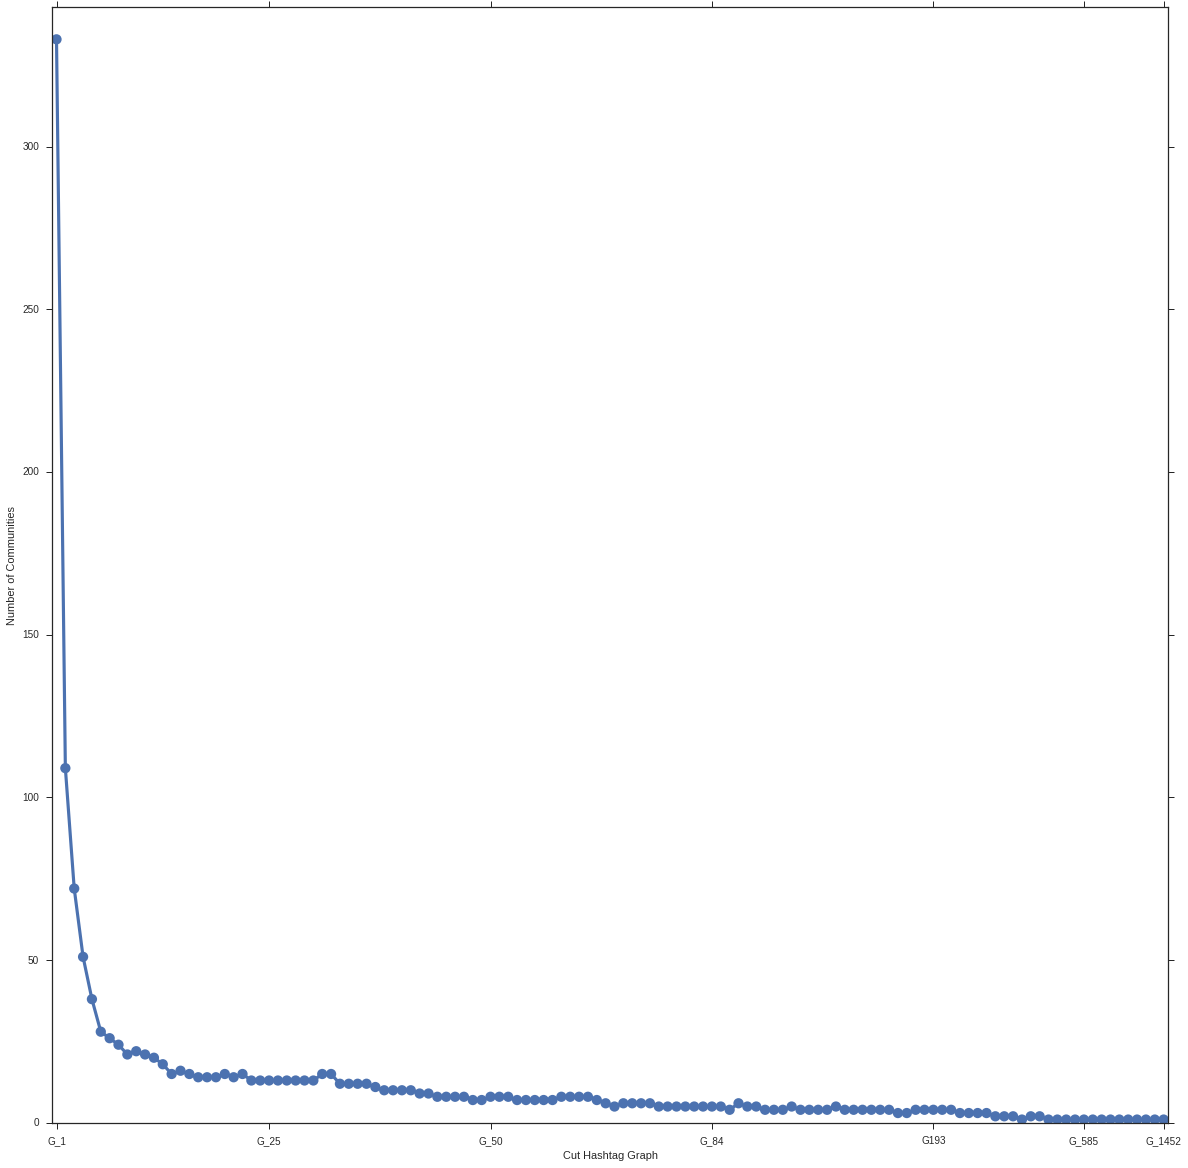

In [32]:
x = cdf["Cut Hashtag Graph"]
y = cdf["Number of Communities"]
plt.figure(figsize=(20,20))

ax=sns.pointplot(x, y)
a1=ax.set(xlabel='Cut Hashtag Graph', ylabel='Number of Communities')
a2=ax.set(xticks=[0, 24 ,49,74,99,116,125], 
                              xticklabels=["G_1","G_25","G_50","G_84","G193","G_585",'G_1452'])
a3=ax.set(ylim=(0,max(lscc)+10))



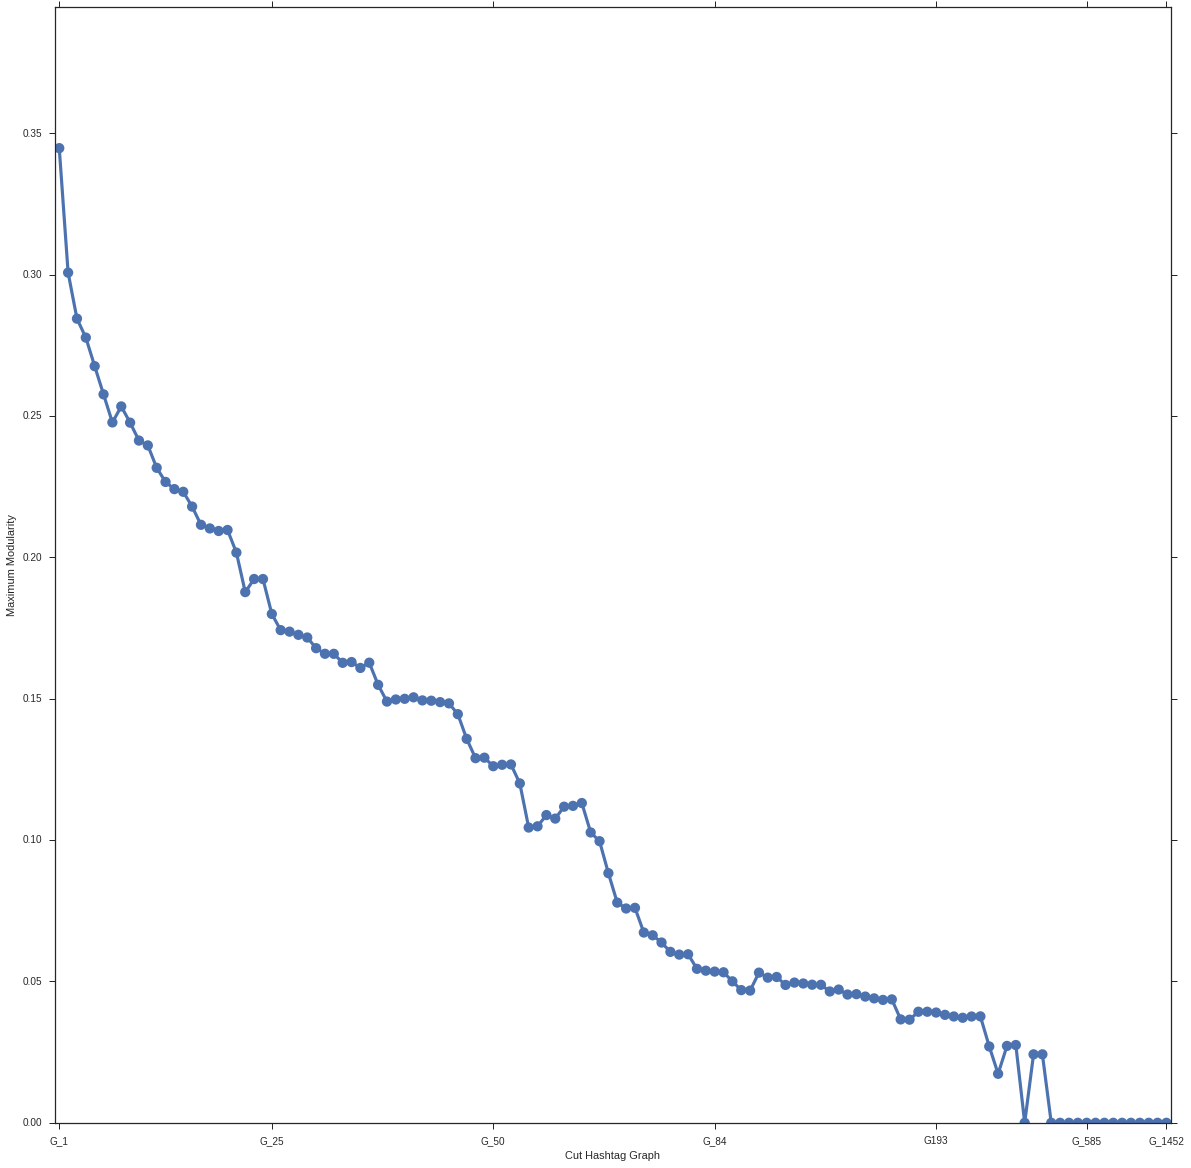

In [33]:
x = cdf["Cut Hashtag Graph"]
y = cdf["Modularity Coefficient"]
plt.figure(figsize=(20,20))

ax=sns.pointplot(x, y)
a1=ax.set(xlabel='Cut Hashtag Graph', ylabel='Maximum Modularity')

a2=ax.set(xticks=[0, 24 ,49,74,99,116,125], 
                              xticklabels=["G_1","G_25","G_50","G_84","G193","G_585",'G_1452'])
a3=ax.set(ylim=(0,max(lsm)+0.05))

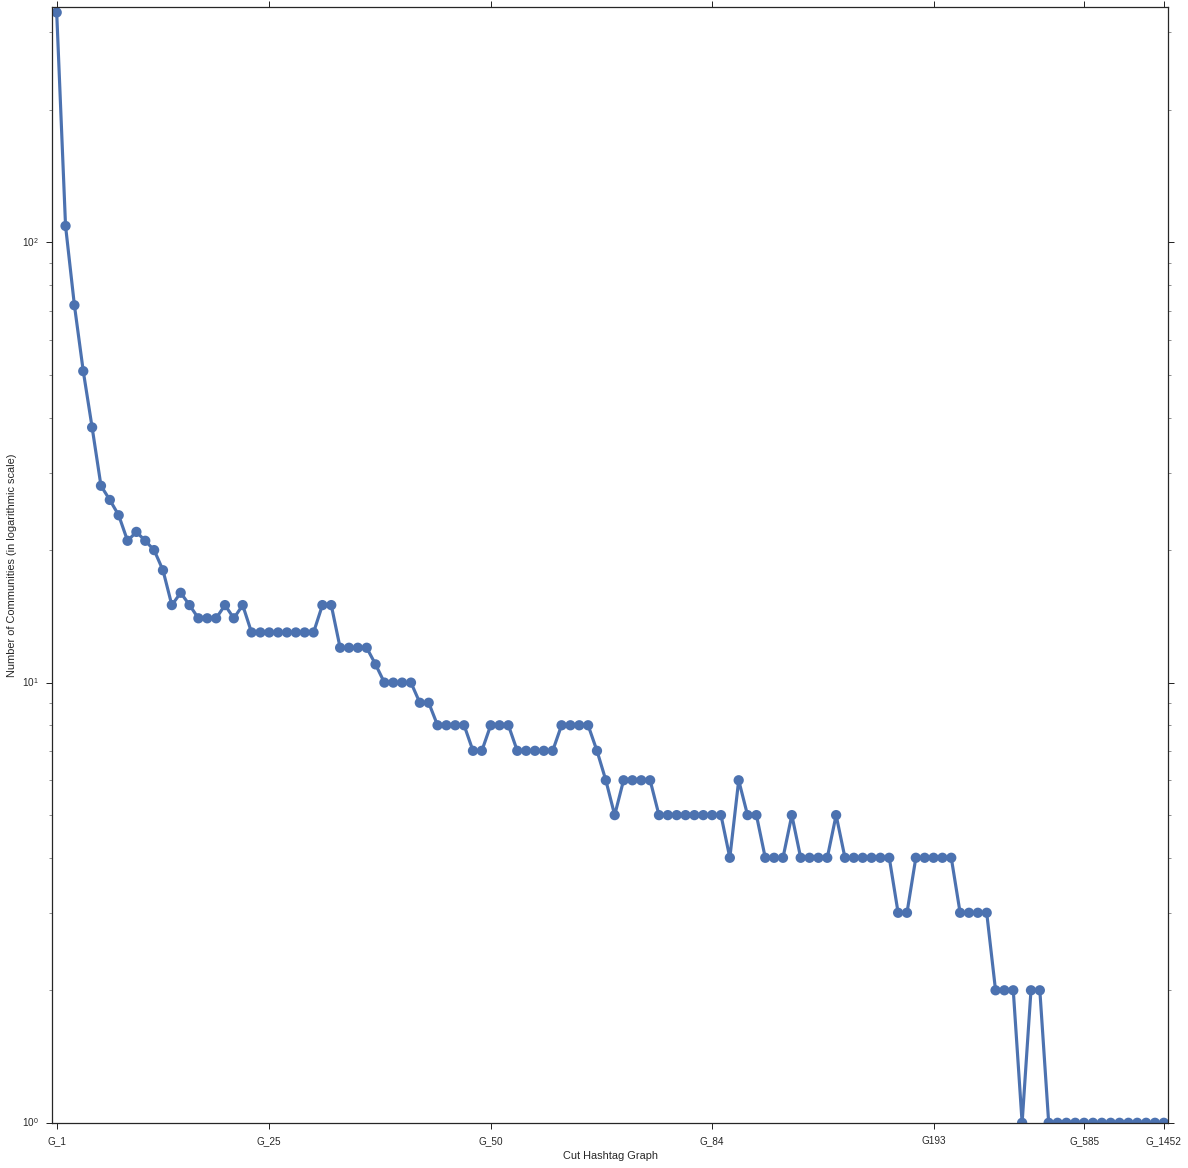

In [34]:
x = cdf["Cut Hashtag Graph"]
y = cdf["Number of Communities"]
plt.figure(figsize=(20,20))


ax=sns.pointplot(x, y)
ax.set(yscale="log")
a1=ax.set(xlabel='Cut Hashtag Graph', ylabel='Number of Communities (in logarithmic scale)')

a2=ax.set(xticks=[0, 24 ,49,74,99,116,125], 
                              xticklabels=["G_1","G_25","G_50","G_84","G193","G_585",'G_1452'])
a3=ax.set(ylim=(0,max(lscc)+10))

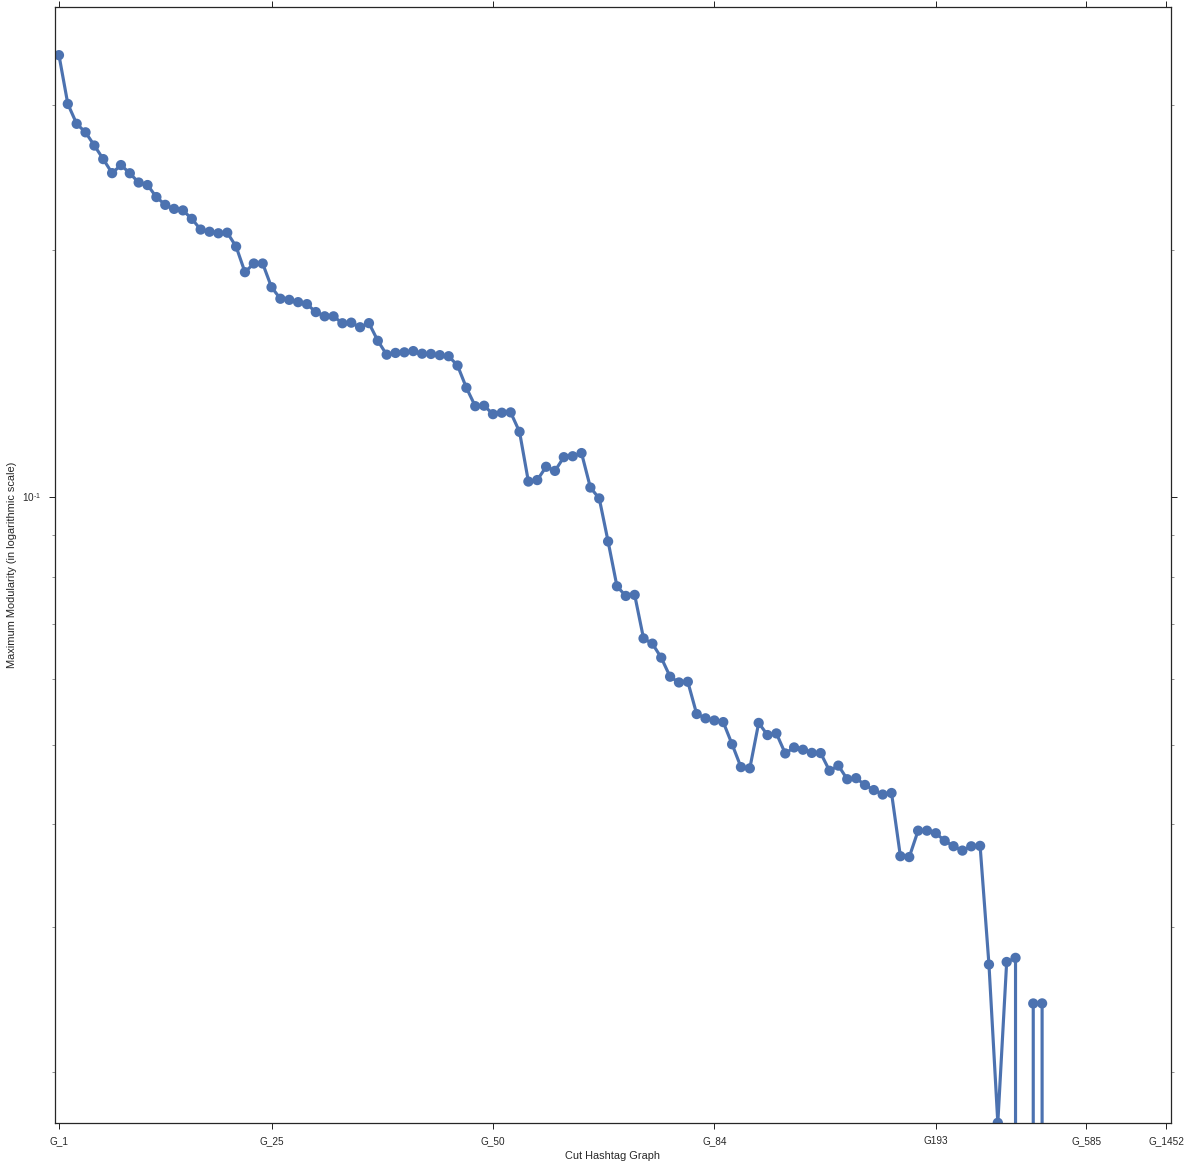

In [35]:
import math
x = cdf["Cut Hashtag Graph"]
y = cdf["Modularity Coefficient"]
plt.figure(figsize=(20,20))


ax=sns.pointplot(x, y)
ax.set(yscale="log")
a1=ax.set(xlabel='Cut Hashtag Graph', ylabel='Maximum Modularity (in logarithmic scale)')

a2=ax.set(xticks=[0, 24 ,49,74,99,116,125], 
                              xticklabels=["G_1","G_25","G_50","G_84","G193","G_585",'G_1452'])
a3=ax.set(ylim=(0,max(lsm)+0.05))

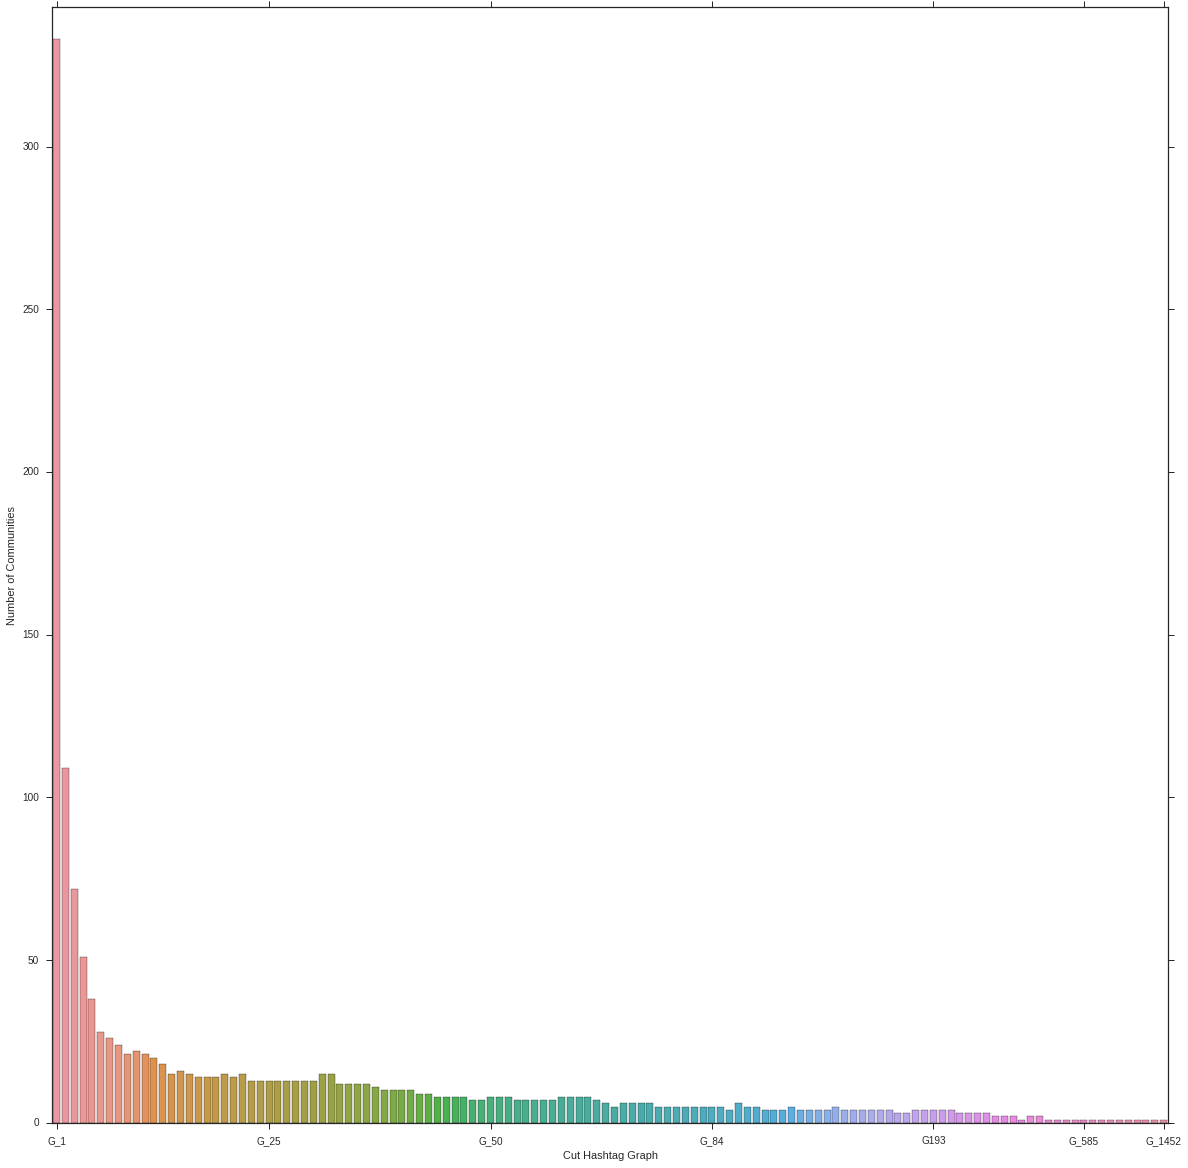

In [36]:
x = cdf["Cut Hashtag Graph"]
y = cdf["Number of Communities"]
plt.figure(figsize=(20,20))

ax=sns.barplot(x, y)
a1=ax.set(xlabel='Cut Hashtag Graph', ylabel='Number of Communities')

a2=ax.set(xticks=[0, 24 ,49,74,99,116,125], 
                              xticklabels=["G_1","G_25","G_50","G_84","G193","G_585",'G_1452'])
a3=ax.set(ylim=(0,max(lscc)+10))


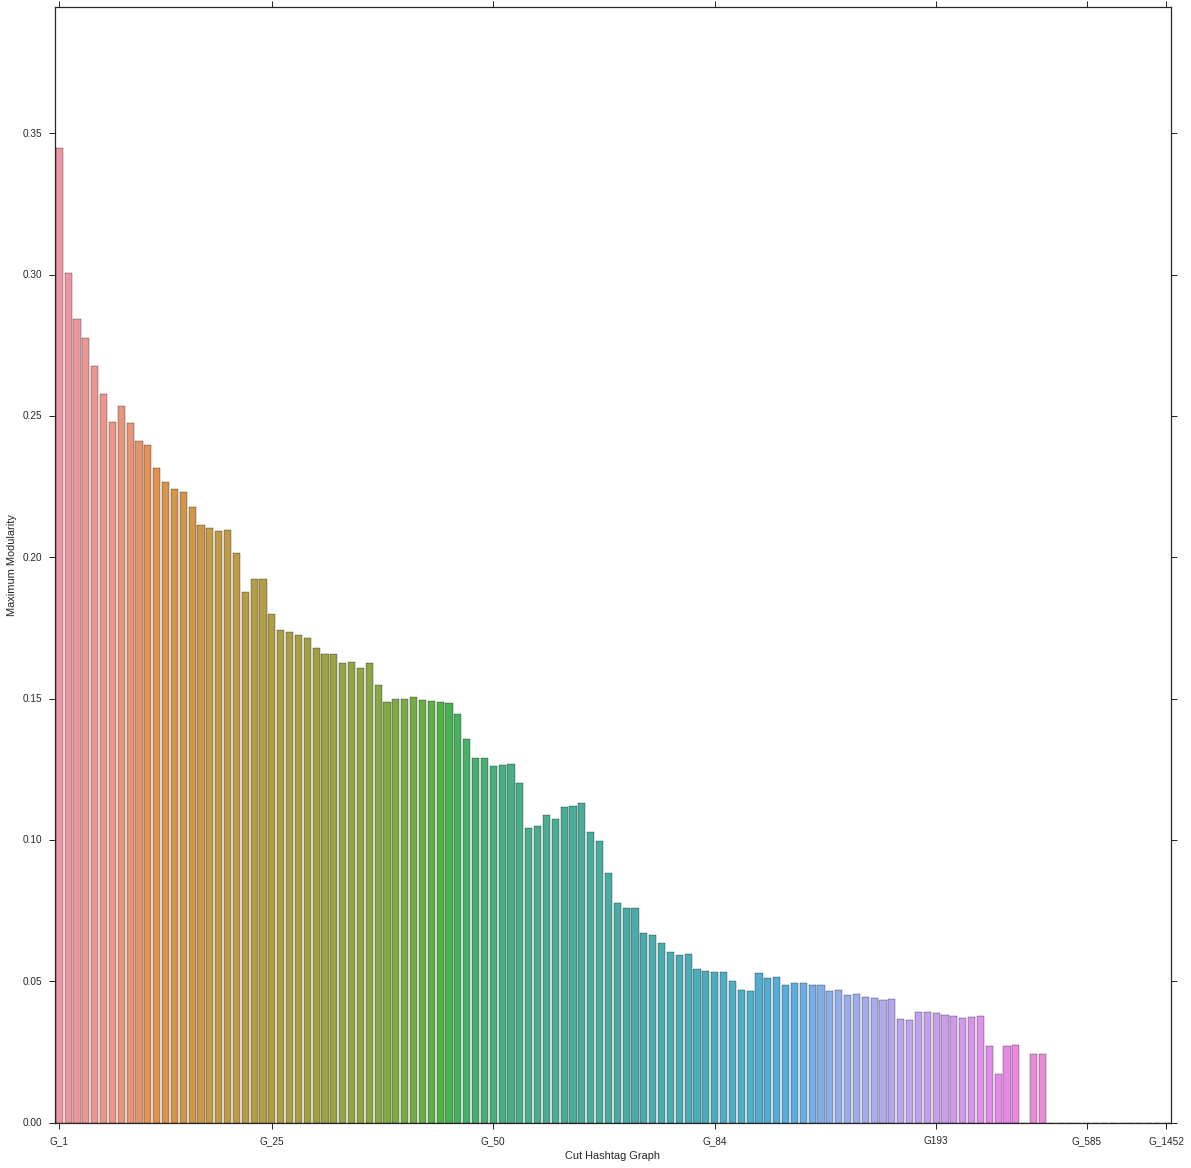

In [37]:
x = cdf["Cut Hashtag Graph"]
y = cdf["Modularity Coefficient"]
plt.figure(figsize=(20,20))


ax=sns.barplot(x, y)
a1=ax.set(xlabel='Cut Hashtag Graph', ylabel='Maximum Modularity')

a2=ax.set(xticks=[0, 24 ,49,74,99,116,125], 
                              xticklabels=["G_1","G_25","G_50","G_84","G193","G_585",'G_1452'])
a3=ax.set(ylim=(0,max(lsm)+0.05))


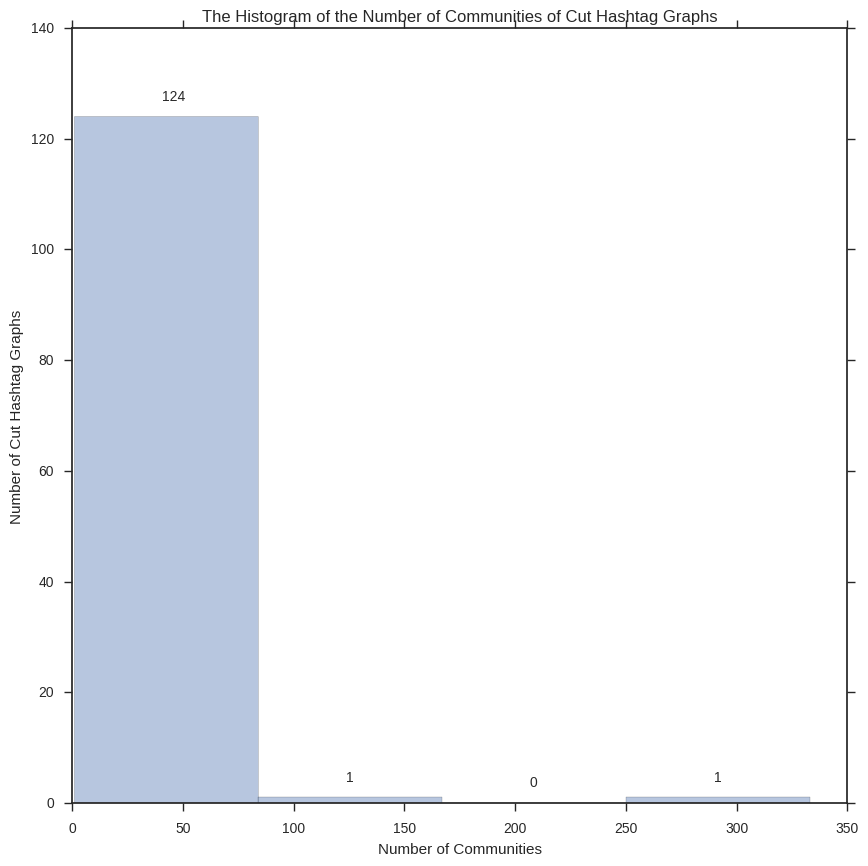

In [18]:
plt.figure(figsize=(10,10))
bins=4
ax=sns.distplot(cdf['Number of Communities'], bins=bins, kde=False, rug=False)
plt.ylabel('Number of Cut Hashtag Graphs')
plt.xlabel('Number of Communities')
tt='The Histogram of the Number of Communities of Cut Hashtag Graphs' 
total = float(len(cdf))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+(((max(lscc)/float(bins))/2)-2), height+ 3, '%i'%(height))#/total))
plt.title(tt)

warnings.filterwarnings("ignore")

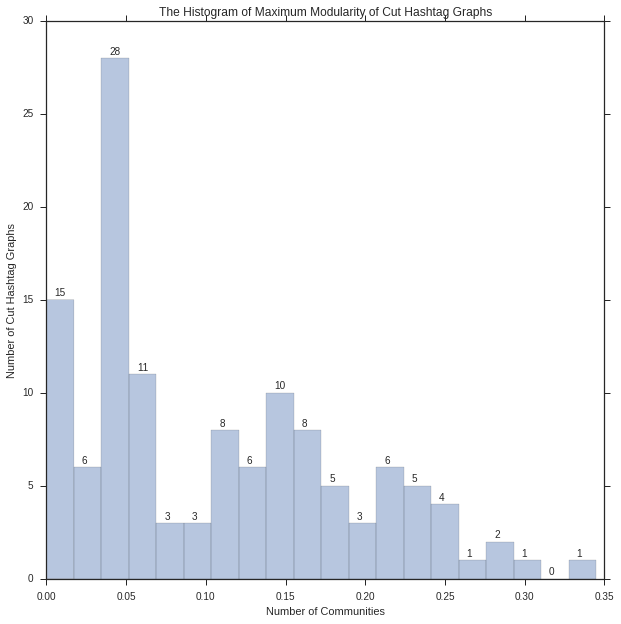

In [38]:
plt.figure(figsize=(10,10))
bins=20
ax=sns.distplot(cdf['Modularity Coefficient'], bins=bins, kde=False, rug=False)
plt.ylabel('Number of Cut Hashtag Graphs')
plt.xlabel('Number of Communities')
tt='The Histogram of Maximum Modularity of Cut Hashtag Graphs' 
total = float(len(cdf))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.005, height+ 0.2, '%i'%(height))#/total))
plt.title(tt)

warnings.filterwarnings("ignore")